Using rasterio to apply a 45 cm offset to snow surveys. I will convert to a numpy array, apply offset, then export as a tiff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
import cartopy.crs as ccrs
import os

%matplotlib inline

In [2]:
#function to add 45 cm to snow depth rasters

In [3]:
#change directory to working drive
out_directory = (r"H:\Metro-Van\2021\GIS\snow_depth_rasters\1m_custom_45cm_offset")
in_file = "P05_sd_1m_custom.tif"
out_name = "VAN_P05_sd_45.tif"

os.chdir(in_directory)

In [4]:
with rio.open(in_file) as src:
    sd = src.read(1)
    sd_meta = src.meta
    sd_crs = src.crs

(22503, 11358)
<class 'numpy.ndarray'>


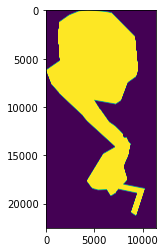

In [5]:
print(sd.shape)
print(type(sd))

plt.imshow(sd)

In [6]:
sd_offset = sd + .45

In [7]:
#testing the offset
print(sd[5000,5000])
print(sd_offset[5000,5000])


-0.52368164
-0.07368165


In [8]:
# create the metadata file for export
display(sd_offset.shape)
sd_meta.update({"driver": "GTiff",
                 "height": sd_offset.shape[0],
                 "width": sd_offset.shape[1]})


(22503, 11358)

In [9]:
#exporting the raster as a tiff
os.chdir(out_directory)
with rio.open(out_name, "w", **sd_meta) as dst:
    dst.write(sd_offset, 1)